### 1. Data Description
The dataset is a collection of 5574 SMS messages and the have been classified as Spam messages or Ham(not Spam). We will use NLP to represent the text in the SMS into numbers and perform a classification using Naive Bayes classifier.

** Objectives **

1.  Convert the words ham and spam to a binary indicator variable(0/1)

2.  Convert the txt to a sparse matrix of TFIDF vectors

3.  Fit a Naive Bayes Classifier

4.  Measure your success using roc_auc_score


### 2. Loading packages and dataset 

In [1]:
# Loading the packages

import pandas as pd
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("sms_spam.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
type    5574 non-null object
text    5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [5]:
df.shape

(5574, 2)

In [6]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,type,text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


#### Convert the spam and ham to 1 and 0 values respectively for probability testing

In [8]:
df.type.replace("spam", 1, inplace=True)
df.type.replace("ham", 0, inplace=True)

In [9]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 3. Text Preprocessing

### 3.1 Text Cleaning

In [10]:
N = 5574 # Number of Messages
corpus = []

In [11]:
import re
import nltk                                  # For Text Preprocessing we use NLTK
from nltk.corpus import stopwords            # Removing all stopwords  
from nltk.stem.porter import PorterStemmer   # Reducing words to base form

In [12]:
ps = PorterStemmer()

for i in range(0, 5574):
    sms = re.sub('[^a-zA-z]', ' ', df['text'][i])  # Removing special symbols like ... ! and keeping only text
    sms = sms.lower()                              # Convert all text to Lower Case
    sms = sms.split()                              # string split into words
    sms = [ps.stem(word) for word in sms           # reducing words to base form
           if not word in set(stopwords.words('english'))]
    sms = " ".join(sms)
    corpus.append(sms)

In [13]:
print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string = " ".join(corpus)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                     max_words=300).generate(word_string)

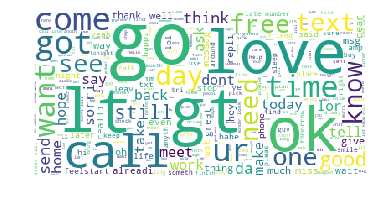

In [15]:
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observation** :

Most common words are go, call, love and ok

In [16]:
# TD-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')

### 4. Separating labels and features

In [17]:
y =df.type

In [18]:
X = vectorizer.fit_transform(corpus)

In [19]:
X.shape

(5574, 6302)

In [20]:
splt_txt_1 = corpus[0].split()

In [21]:
print(splt_txt_1)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']


In [22]:
max(splt_txt_1)

'world'

In [23]:
len(splt_txt_1)

16

** Looking at all the values of X we can observe ** <br>
0 is the first SMS. This goes all the way to 5573 SMS. <br>
5957, 190 etc are the positions of the elements or the words <br>
0.19, 0.35, 0.16 are the tf_idf value of the words <br> 
Like wise we can find the next SMSes & the tf-idf value of the words of the SMSes

In [24]:
X[0]

<1x6302 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

** Looking at all the values of X we can observe ** <br>
0 is the first SMS. This goes all the way to 5573 SMS. <br>
5957, 190 etc are the positions of the elements or the words <br>
0.19, 0.35, 0.16 are the tf_idf value of the words <br> 
Like wise we can find the next SMSes & the tf-idf value of the words of the SMSes

In [25]:
print(X[0])

  (0, 2174)	0.14067036664337382
  (0, 2831)	0.35229072318210347
  (0, 4095)	0.24055604223291524
  (0, 1170)	0.2728281064271195
  (0, 380)	0.26350553820175565
  (0, 739)	0.29761882264685163
  (0, 2248)	0.194611923345502
  (0, 6141)	0.2361695879341298
  (0, 2936)	0.2850598227684076
  (0, 737)	0.3363002173539638
  (0, 965)	0.29761882264685163
  (0, 2211)	0.16499165213970052
  (0, 191)	0.35229072318210347
  (0, 5963)	0.194611923345502


In [26]:
vectorizer.get_feature_names()[6141]

'world'

In [27]:
max(vectorizer.get_feature_names())

'zyada'

In [28]:
print(X.shape)
print(y.shape)

(5574, 6302)
(5574,)


In [29]:
# Split the test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 6. Building the Naive Bayes Model

In [30]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()

In [31]:
# Fit the model
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
# Predict
y_pred = clf.predict(X_test)

In [33]:
y_pred[::-1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
df.loc[[5573]]

,type,text
5573,0,Rofl. Its true to its name


#### Find the probability of assigning a SMS to a specific class

In [35]:
prd = clf.predict_proba(X_test)

In [36]:
prd.shape

(1394, 2)

In [37]:
clf.predict_proba(X_test)[:,1]

array([0.00256579, 0.02621735, 0.07619787, ..., 0.01019614, 0.01757684,
       0.00681856])

In [38]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9812336523438351

### With the model, the success rate is ~98.60%